In [2]:
from l_p2 import persistence_length
import matplotlib.pyplot as plt
import numpy as np
import scipy
import MDAnalysis as mda
from MDAnalysis.analysis import polymer

ref_length = 0.3563594872561357

## Our Code:

### fitting autocorrelation

In [8]:
h = persistence_length(filepath="pcpdtpt_30mer/cg-traj_1mon.gsd",
                       start=100,
                      stop=-1,
                      interval=10)
l_p = h[0]
l_b = h[1]
x_values = h[2]
C_n = h[3]
exp_fit = h[4]
decorr = h[-2]


decorr: 5 63.35623070043233
persistence length: 24.579865456747008


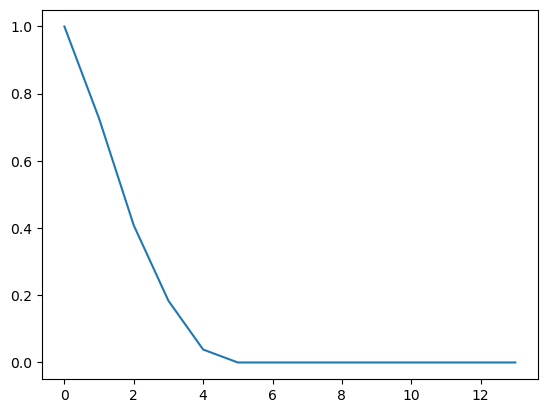

In [11]:
print('decorr:', decorr, decorr*l_b * ref_length * 10)
print('persistence length:',l_p*ref_length*10)
plt.plot(C_n)

### fitting dot products:

In [3]:
h = persistence_length(filepath="pcpdtpt_30mer/cg-traj_1mon.gsd",
                       start=100,
                      stop=-1,
                      interval=10)
l_p = h[0]
l_b = h[1]
x_values = h[2]
C_n = h[3]
exp_fit = h[4]
decorr = h[-2]

persistence length: 51.796763641231166 ang


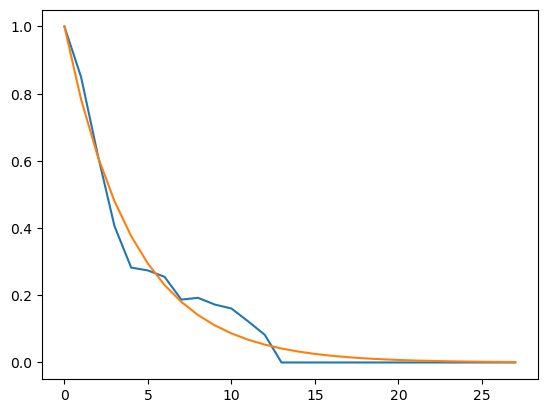

In [7]:
print('persistence length:',l_p*ref_length*10, 'ang')
plt.plot(C_n)
plt.plot(exp_fit)

## MDA code

The persistence length is 95735.63914407877


/Users/Madilyn/miniconda3/envs/persistence_length/lib/python3.11/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/Users/Madilyn/miniconda3/envs/persistence_length/lib/python3.11/site-packages/MDAnalysis/analysis/polymer.py:275: DeprecationWarning: The `lp` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.variance` instead.
  warnings.warn(wmsg, DeprecationWarning)


<Axes: xlabel='x', ylabel='$C(x)$'>

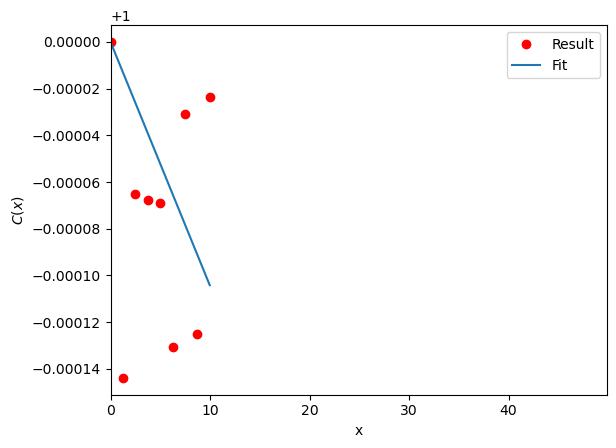

In [8]:
u = mda.Universe(topology='cg-traj.gsd')
chains = u.atoms.fragments
plen = polymer.PersistenceLength(chains)
plen.run()

print('The persistence length is {}'.format(plen.lp))
plen.plot()

In [15]:
plen.lp * ref_length * 10


39.96805207236028

In [16]:
plen.lb

3.458706763943069